Import de todas las librerias necesarias.

Nummpy: Operaciones numéricas eficientes y generación de datos aleatorios

Pandas: Manipulación estructurada de datos

Faker: Generación de datos realistas

Matplotlib: Visualización gráfica de datos

In [132]:
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

Inicializamos el generador de datos "Faker" para generar datos realistas como los nombres. Mediante "es_ES" generamos datos en castellano, por defecto los crearía en inglés.

In [133]:
fake = Faker('es_ES')

Configuramos las probabilidades para crear las notas. Suponemos que sacar entre 5 y 7 es lo más habitual, por eso lo establecemos a 0.5 y el otro 0.5 de probabilidad para el resto de notas.


In [134]:
prob_5_7 = 0.5  
prob_resto = 1 - prob_5_7 

Generamos las 1000 notas gracias a la librería numpy y su función random. Estas se encontrarán entre 1 y 10.

Configuramos las probabilidades para sacar el numero de horas que se estudia diariamente. Suponemos que estudiar entre 3 y 5 es lo más habitual, por eso lo establecemos a 0.5 y el otro 0.5 de probabilidad para el resto de notas.


In [135]:
prob_3_5 = 0.5  
prob_resto = 1 - prob_3_5 

In [136]:
u_horas = np.random.rand(1000)
horas_estudio = np.where(
    u_horas < prob_3_5,
    np.clip(np.random.normal(loc=4, scale=2, size=1000), 3, 5),
    np.random.uniform(0, 9, size=1000)
)

# Convertir a enteros (truncando)
horas_entero = horas_estudio.astype(int)


In [137]:
import numpy as np

np.random.seed(0)

# Supongamos que ya tienes horas_entero con valores entre 0 y 8
horas_entero = horas_entero  # array de 1000 ints entre 0 y 8

# Parámetros del modelo
intercepto = 2.0    # nota mínima esperada cuando horas = 0
pendiente = 1.0     # cuánto sube la nota por cada hora extra
sigma_ruido = 1.5   # desviación estándar del ruido

# Generamos la nota "continuo"
nota_cont = intercepto + pendiente * horas_entero + np.random.normal(0, sigma_ruido, size=horas_entero.size)

# Recortamos al rango [0, 10]
nota_cont = np.clip(nota_cont, 0, 10)

# Convertimos a entero (truncando o redondeando)
notas_entero = np.rint(nota_cont).astype(int)


Creamos un diccionario de datos estructurado que luego se convertirá en un DataFrame de pandas.
Generamos una lista de 1000 nombres completos aleatorios en español usando Faker, asignamos aleatoriamente una de las 3 asignaturas a cada estudiante y finalmente Asignamos las notas generadas previamente (array NumPy) y las convertimos a enteros.



In [138]:
data = {
    'DNI': np.random.randint(1000, 9999, size=1000),
    'Nombre': [f"{fake.first_name()} {fake.last_name()}" for _ in range(1000)],
    'Asignatura': np.random.choice(['Matematicas', 'Fisica', 'Programacion'], 1000),
    'Nota': notas_entero,
    'horas_estudio': horas_entero,
    'Edad': np.random.randint(18, 26, size=1000),
    'Sexo': np.random.choice(['Masculino', 'Femenino'], size=1000),
    'Ciudad': [fake.city() for _ in range(1000)],
    'Correo': [fake.email() for _ in range(1000)],
    'Telefono': [fake.phone_number() for _ in range(1000)]
}

In [139]:
missing_rate = 0.05  # 5% de valores nulos por columna
for col in ['Edad', 'Sexo', 'Ciudad', 'Correo', 'Telefono']:
    mask = np.random.rand(len(data['DNI'])) < missing_rate
    # Para columnas numéricas (Edad) usar np.nan, para las demás, None
    if col == 'Edad':
        series = pd.Series(data[col], dtype=float)
        data[col] = series.where(~mask, np.nan)
    else:
        series = pd.Series(data[col])
        data[col] = series.where(~mask, None)

Convertimos el diccionario data en una tabla estructurada (DataFrame) de pandas con columnas "Nombre", "Asignatura" y "Nota" y lo guardamos en csv (alumnos_deusto).

Añadimos encoding='utf-8-sig' para que solamente se utilicen los caracteres estandar, ya que sin ello, Faker genera nombres con tildes, por lo que en el csv aparecen mal.

Ejemplo: En vez de Menéndez, aparece MenÃ©ndez

In [140]:
df = pd.DataFrame(data)
df.to_csv('alumnos_deusto.csv', index=False, encoding='utf-8-sig')

In [141]:
df.head()

,DNI,Nombre,Asignatura,Nota,horas_estudio,Edad,Sexo,Ciudad,Correo,Telefono
0,3912,Jonatan Mayoral,Programacion,10,8,22.0,Femenino,Huelva,valeramicaela@example.com,+34827 974 234
1,7175,Marco Hernandez,Programacion,5,2,22.0,Masculino,Cantabria,walter42@example.org,+34 883395677
2,9086,Florinda Oller,Fisica,3,0,25.0,Masculino,None,etorrijos@example.net,+34984 228 278
3,4454,Antonio Madrigal,Fisica,10,6,24.0,Masculino,Santa Cruz de Tenerife,ainoacespedes@example.net,+34983 12 54 97
4,6945,Rafaela Berenguer,Programacion,10,5,20.0,Femenino,Valencia,marcio76@example.org,+34 882 63 71 15


In [142]:
df.isnull().sum()

DNI               0
Nombre            0
Asignatura        0
Nota              0
horas_estudio     0
Edad             52
Sexo             46
Ciudad           49
Correo           47
Telefono         55
dtype: int64

Cargamos el csv original para dividirlo en 2 archivos (alumnos  notas)

In [143]:
df = pd.read_csv('alumnos_deusto.csv', encoding='utf-8-sig')

Archivo de alumnos (sin notas)

In [144]:
df[['Nombre']].to_csv('alumnos.csv', index=False)


Archivo de notas (asignatura + nota)

In [145]:
df[['Asignatura', 'Nota']].to_csv('notas.csv', index=False)


## Limpieza

### Duplicados
Verificamos que no haya. En caso de haber borramos la segunda aparición y lo guardamos en otro csv.

In [146]:
duplicados = df[df["DNI"].duplicated()]

In [147]:
if not duplicados.empty:
    print("Hay DNIs duplicados:")
    print(duplicados)
else:
    print("No hay DNIs duplicados.")

Hay DNIs duplicados:
      DNI                  Nombre    Asignatura  Nota  horas_estudio  Edad  \
90   9033          Albano Cazorla   Matematicas     9              8  22.0   
135  2260           Elena Borrego        Fisica    10              7  20.0   
143  1492                Joel Bru   Matematicas     6              3  24.0   
248  4139        Paulina Aragonés  Programacion     6              5  25.0   
268  4707         Ildefonso Bueno        Fisica     5              3  22.0   
334  2782            Juanito Pina  Programacion     4              6  22.0   
351  3583           Rosalva Girón  Programacion     3              3  20.0   
359  4877          Poncio Gimenez  Programacion     7              4   NaN   
360  4530          Bautista Soler  Programacion     8              5  25.0   
366  5893            Eligia Rocha   Matematicas     5              3  21.0   
381  9552              Víctor Amo  Programacion    10              8  24.0   
404  1080       Pepita Villalobos   Matemat

In [148]:
print("Tamaño antes de borrar duplicados: ", df.shape)

print("Numero de duplicados antes de eliminarlos: ", df.duplicated(subset='DNI', keep='first').sum())

df_sin_duplicados = df.drop_duplicates(subset='DNI', keep='first')
df_sin_duplicados.to_csv("alumnos_deusto_sin_duplicados.csv", index=False)

print("Numero de duplicados despues de eliminarlos: ",df_sin_duplicados.duplicated(subset='DNI', keep='first').sum())

print("Tamaño despues de borrar duplicados: ", df_sin_duplicados.shape)


Tamaño antes de borrar duplicados:  (1000, 10)
Numero de duplicados antes de eliminarlos:  53
Numero de duplicados despues de eliminarlos:  0
Tamaño despues de borrar duplicados:  (947, 10)


### Nulos
Verificamos que no haya. En caso de haber borramos la linea con valores nulos y lo guardamos en otro csv.

In [149]:
df = pd.read_csv('alumnos_deusto_sin_duplicados.csv', encoding='utf-8-sig')

print("Tamaño original: ", df.shape)

print("Valores nulos por columna:")
print(df.isnull().sum(), "\n")

df_sin_nulos = df.dropna()
print("Tamaño tras dropna:", df_sin_nulos.shape)

print("\n Valores nulos por columna tras el dropna:")
print(df_sin_nulos.isnull().sum(), "\n")

df_sin_nulos.to_csv("alumnos_deusto_sin_nulos.csv", index=False)

Tamaño original:  (947, 10)
Valores nulos por columna:
DNI               0
Nombre            0
Asignatura        0
Nota              0
horas_estudio     0
Edad             47
Sexo             43
Ciudad           47
Correo           44
Telefono         52
dtype: int64 

Tamaño tras dropna: (732, 10)

 Valores nulos por columna tras el dropna:
DNI              0
Nombre           0
Asignatura       0
Nota             0
horas_estudio    0
Edad             0
Sexo             0
Ciudad           0
Correo           0
Telefono         0
dtype: int64 



## Resumen de las estadisticas

In [150]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv('alumnos_deusto_sin_nulos.csv', encoding='utf-8-sig')

# Columnas a analizar
cols = ['Nota', 'horas_estudio', 'Edad']

# Función para imprimir estadísticas de una serie numérica
def resumen_columna(serie: pd.Series):
    nombre = serie.name
    print(f"----- {nombre} -----")
    print(f"Mediana:               {serie.median()}")
    print(f"Mínimo:                {serie.min()}")
    print(f"Máximo:                {serie.max()}")
    print(f"Media:                 {serie.mean():.2f}")
    print(f"Desviación estándar:   {serie.std():.2f}")
    print(f"Varianza:              {serie.var():.2f}")
    print(f"Rango (max - min):     {serie.max() - serie.min()}\n")

# Estadísticas descriptivas generales
print(df[cols].describe().T, "\n")  # .T para ver cada columna en fila

# Estadísticas detalladas por columna
for col in cols:
    resumen_columna(df[col])


               count       mean       std   min   25%   50%   75%   max
Nota           732.0   5.807377  2.362451   0.0   4.0   6.0   7.0  10.0
horas_estudio  732.0   3.952186  1.902309   0.0   3.0   4.0   5.0   8.0
Edad           732.0  21.437158  2.311013  18.0  19.0  22.0  23.0  25.0 

----- Nota -----
Mediana:               6.0
Mínimo:                0
Máximo:                10
Media:                 5.81
Desviación estándar:   2.36
Varianza:              5.58
Rango (max - min):     10

----- horas_estudio -----
Mediana:               4.0
Mínimo:                0
Máximo:                8
Media:                 3.95
Desviación estándar:   1.90
Varianza:              3.62
Rango (max - min):     8

----- Edad -----
Mediana:               22.0
Mínimo:                18.0
Máximo:                25.0
Media:                 21.44
Desviación estándar:   2.31
Varianza:              5.34
Rango (max - min):     7.0



Aqui se pueden ver de forma ordenala, los minimos, maximos, mediana, media, desviación, varianza y rango de los valores numericos nota, edad y horas de estudio

## Visualización

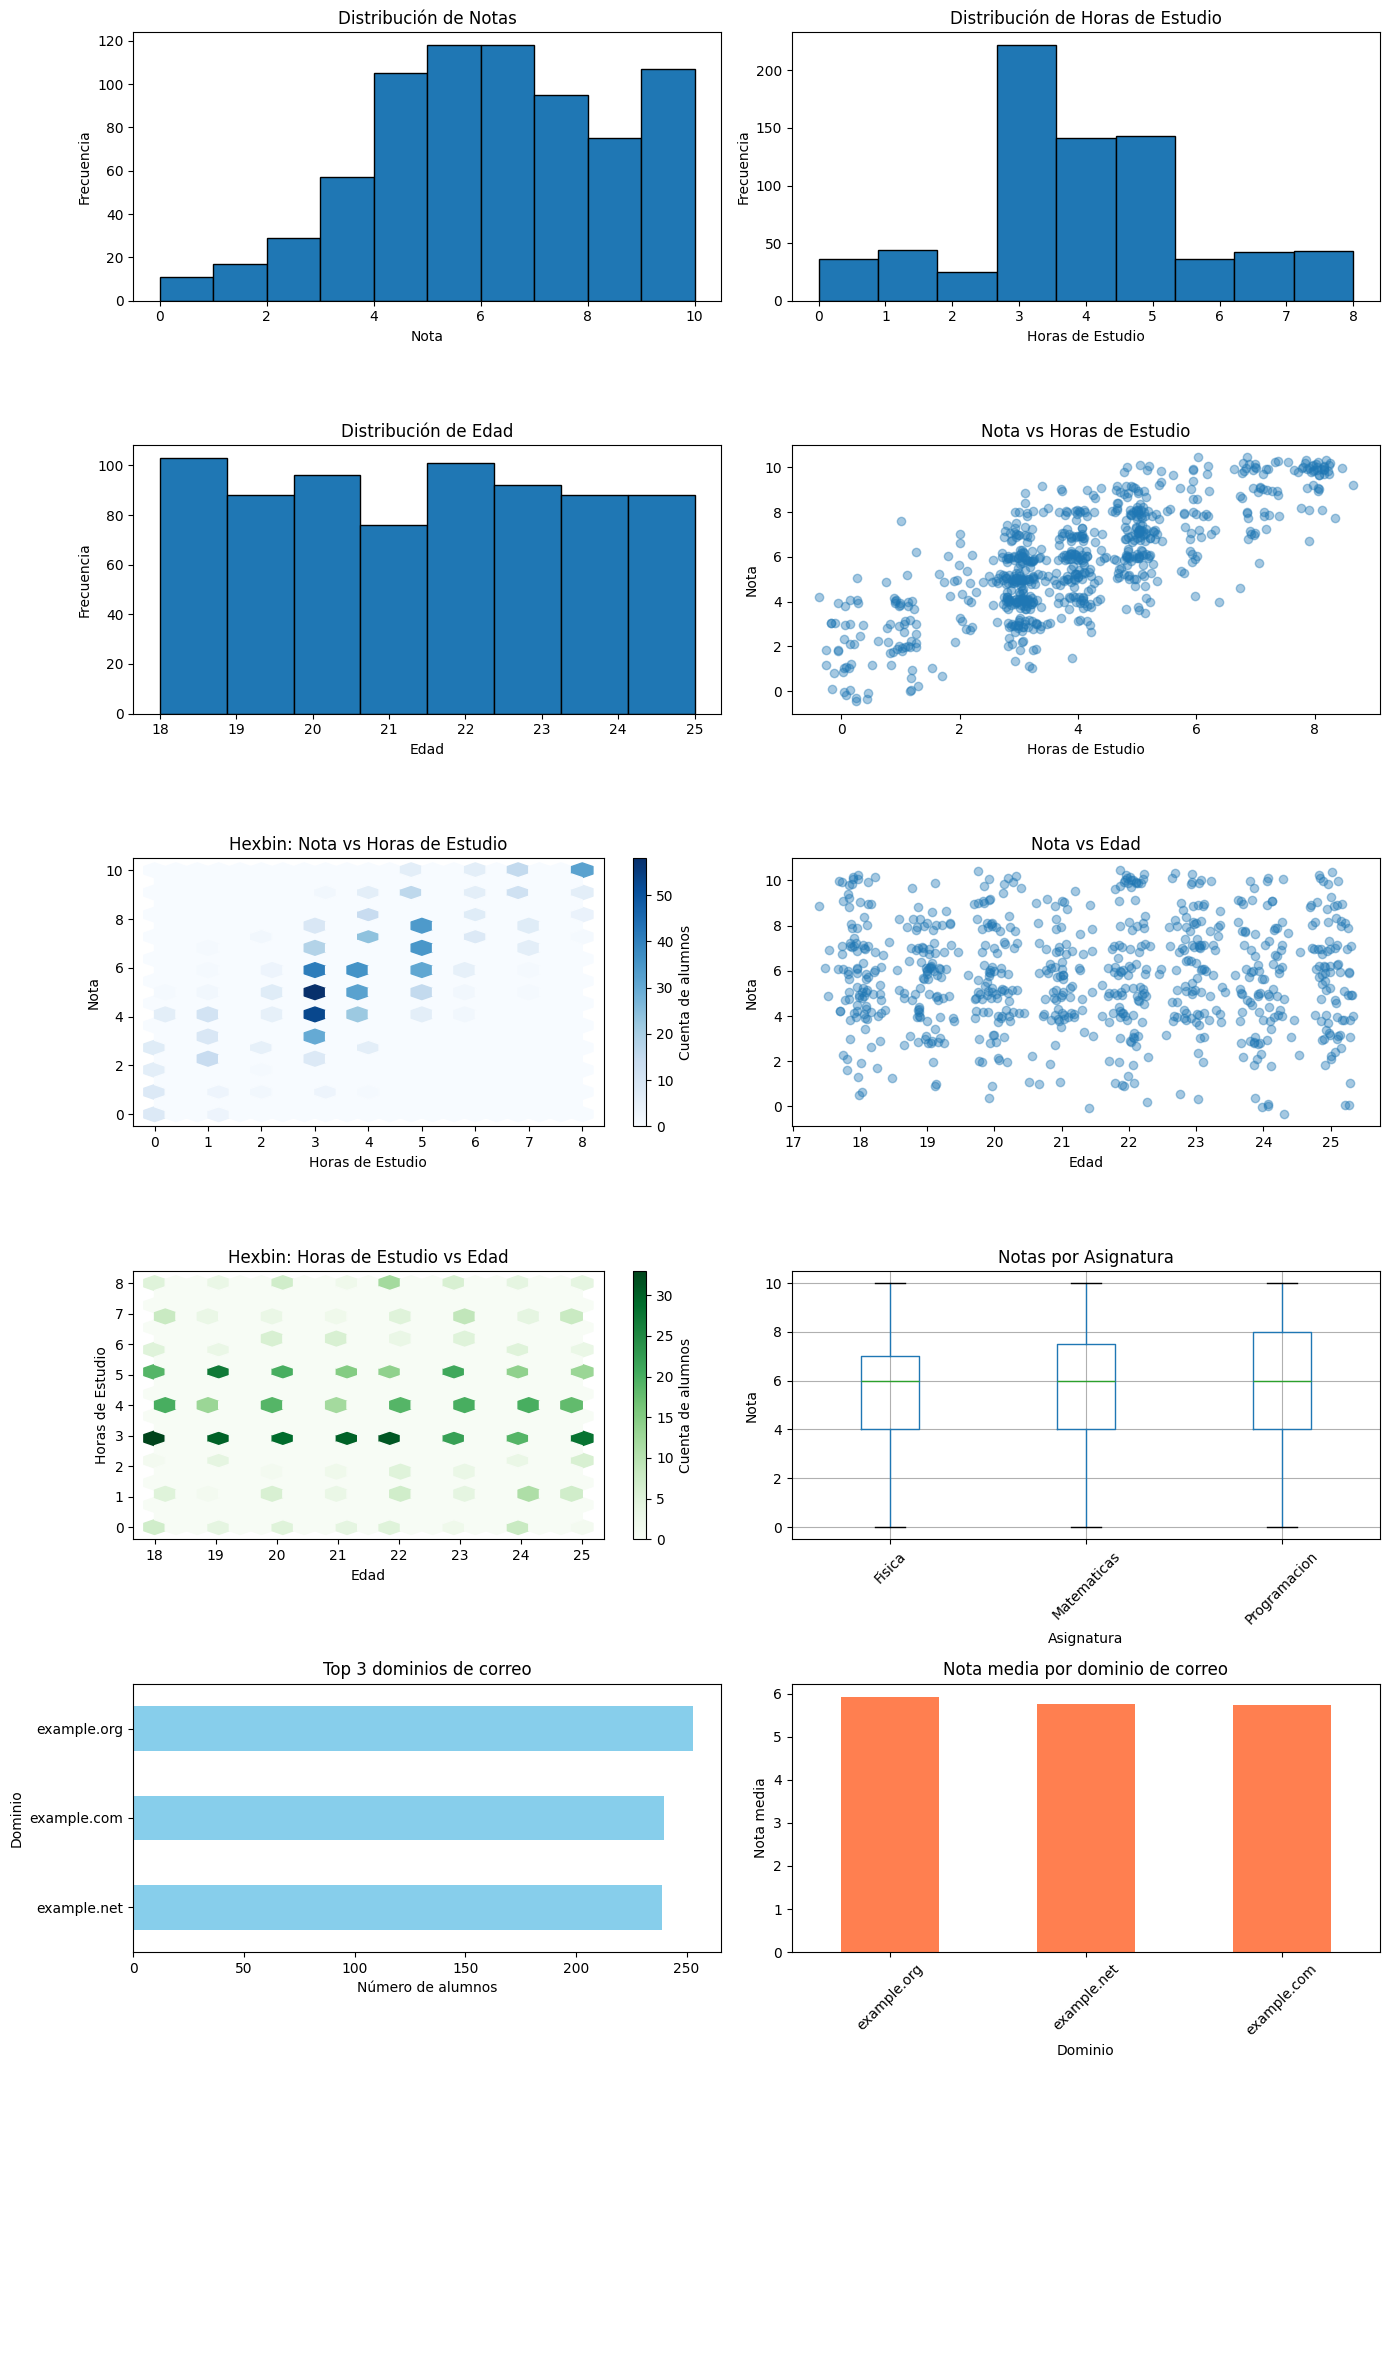

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('alumnos_deusto_sin_nulos.csv', encoding='utf-8-sig')

jitter_scale = 0.2
alpha = 0.4

# Extraer dominio
df['Dominio'] = df['Correo'].str.extract(r'@([\w\.-]+\.\w+)$')

# Métricas de dominio
conteo_dominios = df['Dominio'].value_counts()
nota_media_por_dominio = df.groupby('Dominio')['Nota'].mean().sort_values(ascending=False)

# Creamos 6 filas x 2 columnas = 12 ejes, y ajustamos tamaño
fig, axes = plt.subplots(6, 2, figsize=(14, 24))
axes = axes.flatten()

# 1: Histograma de Nota
axes[0].hist(df['Nota'], bins=10, edgecolor='black')
axes[0].set_title('Distribución de Notas')
axes[0].set_xlabel('Nota')
axes[0].set_ylabel('Frecuencia')

# 2: Histograma de Horas de Estudio
axes[1].hist(df['horas_estudio'], bins=9, edgecolor='black')
axes[1].set_title('Distribución de Horas de Estudio')
axes[1].set_xlabel('Horas de Estudio')
axes[1].set_ylabel('Frecuencia')

# 3: Histograma de Edad
axes[2].hist(df['Edad'].dropna(), bins=8, edgecolor='black')
axes[2].set_title('Distribución de Edad')
axes[2].set_xlabel('Edad')
axes[2].set_ylabel('Frecuencia')

# 4: Scatter Nota vs Horas (jitter)
x1 = df['horas_estudio'] + np.random.normal(0, jitter_scale, size=len(df))
y1 = df['Nota']          + np.random.normal(0, jitter_scale, size=len(df))
axes[3].scatter(x1, y1, alpha=alpha)
axes[3].set_title('Nota vs Horas de Estudio')
axes[3].set_xlabel('Horas de Estudio')
axes[3].set_ylabel('Nota')

# 5: Hexbin Nota vs Horas
hb1 = axes[4].hexbin(df['horas_estudio'], df['Nota'], gridsize=20, cmap='Blues')
fig.colorbar(hb1, ax=axes[4], label='Cuenta de alumnos')
axes[4].set_title('Hexbin: Nota vs Horas de Estudio')
axes[4].set_xlabel('Horas de Estudio')
axes[4].set_ylabel('Nota')

# 6 eliminado

# 7: Scatter Nota vs Edad (jitter)
x2 = df['Edad'].fillna(df['Edad'].mean()) + np.random.normal(0, jitter_scale, size=len(df))
y2 = df['Nota'] + np.random.normal(0, jitter_scale, size=len(df))
axes[5].scatter(x2, y2, alpha=alpha)
axes[5].set_title('Nota vs Edad')
axes[5].set_xlabel('Edad')
axes[5].set_ylabel('Nota')

# 8: Hexbin Horas vs Edad
hb2 = axes[6].hexbin(df['Edad'], df['horas_estudio'], gridsize=20, cmap='Greens')
fig.colorbar(hb2, ax=axes[6], label='Cuenta de alumnos')
axes[6].set_title('Hexbin: Horas de Estudio vs Edad')
axes[6].set_xlabel('Edad')
axes[6].set_ylabel('Horas de Estudio')

# 9: Boxplot Notas por Asignatura
df.boxplot(column='Nota', by='Asignatura', ax=axes[7], rot=45)
axes[7].set_title('Notas por Asignatura')
axes[7].set_xlabel('Asignatura')
axes[7].set_ylabel('Nota')
axes[7].figure.suptitle('')

# 10: Top 3 dominios (barh)
conteo_dominios.head(3).plot(
    kind='barh',
    ax=axes[8],
    color='skyblue'
)
axes[8].set_title("Top 3 dominios de correo")
axes[8].set_xlabel("Número de alumnos")
axes[8].set_ylabel("Dominio")
axes[8].invert_yaxis()

# 11: Nota media por dominio (bar)
nota_media_por_dominio.plot(
    kind='bar',
    ax=axes[9],
    color='coral'
)
axes[9].set_title("Nota media por dominio de correo")
axes[9].set_xlabel("Dominio")
axes[9].set_ylabel("Nota media")
axes[9].tick_params(axis='x', rotation=45)

# Ocultar ejes sobrantes (12 en total, sólo usamos 10)
for ax in axes[10:]:
    ax.axis('off')

# Ajuste y muestra
plt.tight_layout()
plt.show()


### Distribución de Notas

Representa la frecuencia de las notas obtenidas por los alumnos.

Se observa que la mayoría de las notas están entre 5 y 6.

Útil para ver la tendencia central y la dispersión general del rendimiento académico.

### Distribución de Horas de Estudio

Muestra cuántos alumnos estudian cierta cantidad de horas por semana.

La mayoría parece estudiar entre 3 y 5 horas.

Permite identificar hábitos de estudio predominantes.

### Distribución de Edad

Indica la frecuencia de las edades en la muestra de alumnos.

Las edades se agrupan mayoritariamente entre los 18 y 25 años.

Es útil para saber si el grupo es homogéneo en cuanto a edad.

### Nota vs Horas de Estudio (Scatter con jitter)

Relaciona las horas de estudio con la nota obtenida.

Se usa jitter (ruido aleatorio) para evitar la superposición de puntos.

No se aprecia una correlación clara, lo cual puede indicar que estudiar más no garantiza una mejor nota.

###  Hexbin: Nota vs Horas de Estudio

Visualización alternativa al scatter, agrupando los puntos en hexágonos.

Más útil cuando hay gran cantidad de datos que se solapan.

Se identifica una concentración importante alrededor de 4-5 horas de estudio y nota de 5-6.

###  Boxplot Nota por Horas de Estudio

Compara la distribución de notas para cada valor específico de horas de estudio.

Muestra la mediana, cuartiles y posibles valores atípicos.

Aunque puede parecer caótico, ayuda a identificar si hay alguna tendencia o dispersión relevante.

### Nota vs Edad (Scatter con jitter)

Relaciona las horas de estudio con la edad del alumnado.

Se usa jitter (ruido aleatorio) para evitar la superposición de puntos.

Vemos como la mayoría de las notas se encuentran en torno al 6 sin importar la edad del alumno. Por el resto, se observan datos muy aleatorio/ distintos.


###  Hexbin: Edad vs Horas de Estudio

Visualización alternativa al scatter, agrupando los puntos en hexágonos.

Más útil cuando hay gran cantidad de datos que se solapan.

Vemos que la mayoría de gente estudia en torno a 3 y 5 horas sea cual sea la edad.


###  Notas por Asignatura

Representación en cajas de las asignaturas junto a su nota.

Vemos que la mayoría de las notas se encuentran entre el 4 y el 7, siendo matemáticas la asignatura con peor nota.



In [156]:
import os
import logging
from datetime import datetime
from dotenv import load_dotenv
import pandas as pd
from elasticsearch import Elasticsearch, exceptions
import requests

# Configuración de logging
def configure_logging():
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s [%(levelname)s] %(message)s',
        datefmt='%Y-%m-%d %H:%M:%S'
    )

configure_logging()

# Cargar variables de entorno desde .env en el directorio actual
load_dotenv()

ES_HOST     = os.getenv("ES_HOST", "localhost")
ES_PORT     = os.getenv("ES_PORT", "9200")
ES_USER     = os.getenv("ELASTIC_USER", "elastic")
ES_PASSWORD = os.getenv("ELASTIC_PASSWORD")
CSV_FILE    = os.getenv("CSV_FILE", "alumnos_deusto_sin_nulos.csv")
INDEX_NAME  = os.getenv("ES_INDEX", "indice-alumnos-deusto")
KB_PORT     = os.getenv("KIBANA_PORT", "5601")
KB_PASSWORD = os.getenv("KIBANA_PASSWORD")

# Crear cliente de Elasticsearch (v8+)
# Usamos la URL completa y basic_auth
es = Elasticsearch(
    [f"https://{ES_HOST}:{ES_PORT}"],
    basic_auth=(ES_USER, ES_PASSWORD),
    verify_certs=False
)

# Definir mapping basado en las columnas del CSV
mapping = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "DNI":           {"type": "long"},
            "Nombre":        {"type": "text"},
            "Asignatura":    {"type": "keyword"},
            "Nota":          {"type": "long"},
            "horas_estudio": {"type": "integer"},
            "Edad":          {"type": "integer"},
            "Sexo":          {"type": "keyword"},
            "Ciudad":        {"type": "keyword"},
            "Correo":        {"type": "keyword"},
            "Telefono":      {"type": "keyword"}
        }
    }
}

# Crear índice si no existe
try:
    if not es.indices.exists(index=INDEX_NAME):
        es.indices.create(index=INDEX_NAME, body=mapping)
        logging.info(f"Índice '{INDEX_NAME}' creado correctamente.")
    else:
        logging.info(f"Índice '{INDEX_NAME}' ya existe.")
except exceptions.ElasticsearchException as e:
    logging.error(f"Error al crear o comprobar el índice: {e}")
    raise

# Cargar CSV en DataFrame
try:
    df = pd.read_csv(CSV_FILE)
    logging.info(f"CSV cargado correctamente. Filas totales: {len(df)}")
except Exception as e:
    logging.error(f"Error al leer el CSV: {e}")
    raise

df.count()


a = 0

# Iterar y indexar documentos
for idx, row in df.iterrows():
    doc = row.to_dict()
    # Convertir NaN a None para evitar errores
    doc = {k: (None if pd.isna(v) else v) for k, v in doc.items()}
    try:
        res = es.index(index=INDEX_NAME, document=doc)
        #logging.info(f"Documento insertado - ID ES: {res.get('_id')}")
        a += 1
    except exceptions.ElasticsearchException as e:
        logging.error(f"\n\n\n\n\n\n\n\nError al indexar fila {idx}: {e}\n\n\n\n\n\n\n\n")

logging.info(f"Total de documentos insertados: {a} de {len(df)} filas del CSV.")

logging.info("Inserción de datos completada.")

kb_base = f"http://localhost:{KB_PORT}/api/data_views"

# Comprobar si ya existe la Data View
find_url = f"{kb_base}/_find?search={INDEX_NAME}&type=index_pattern"
resp_find = requests.get(
    find_url,
    auth=(ES_USER, KB_PASSWORD),
    headers={"kbn-xsrf": "true"}
)

if resp_find.status_code == 200 and resp_find.json().get("total", 0) > 0:
    logging.info("Data View para índice '%s' ya existe.", INDEX_NAME)
else:
    # Crear Data View
    create_url = f"{kb_base}/data_view"
    payload = {
        "data_view": {
            "title": INDEX_NAME,
            "name": "deusto_view"  # Nombre personalizado para la vista
            # "timeFieldName": "marca_temporal"  # No lo incluimos si no hay campo fecha
        }
    }
    resp_create = requests.post(
        create_url,
        json=payload,
        auth=(ES_USER, KB_PASSWORD),
        headers={"kbn-xsrf": "true"}
    )
    if resp_create.status_code in (200, 201):
        logging.info("Data View 'deusto_view' creada en Kibana.")
    else:
        logging.error(
            "Error al crear Data View: %s %s",
            resp_create.status_code,
            resp_create.text
        )


c:\Users\Deusto\OneDrive - Universidad de Deusto\Escritorio\iot\Analisis\.venv\Lib\site-packages\elasticsearch\_sync\client\__init__.py:403: SecurityWarning: Connecting to 'https://localhost:9200' using TLS with verify_certs=False is insecure
  _transport = transport_class(
c:\Users\Deusto\OneDrive - Universidad de Deusto\Escritorio\iot\Analisis\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
2025-05-15 16:40:48 [INFO] HEAD https://localhost:9200/indice-alumnos-deusto [status:404 duration:0.257s]
c:\Users\Deusto\OneDrive - Universidad de Deusto\Escritorio\iot\Analisis\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly 